### IMPORTS

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### INPUT AND OUTPUT

In [7]:
# ----- #
# INPUT #
# ----- #
with open('../config/repository_path.txt', 'r') as reader:
    repository_path = reader.read().strip()

results_file = os.path.join(repository_path, 'results', 'representation_simulations.csv')
assert os.path.isfile(results_file)

### Original Data

In [8]:
df = pd.read_csv(results_file)
df.shape

(315, 39)

### Average Data

In [9]:
average_data= {'N': [],
               'n': [],
               'Representation': [],
               'Effort': []
              }
metrics = ['Precision (training)',
           'Recall (training)',
           'F1-Score (training)',
           'Precision (test)',
           'Recall (test)',
           'F1-Score (test)',
           'Precision (held-out)',
           'Recall (held-out)',
           'F1-Score (held-out)',
          ]
for metric in metrics:
    average_data[metric]=[]
    
for (N,n,representation),auxdf in list(df.groupby(['N', 'n', 'Representation'])):
    average_data['Representation'].append(representation)
    average_data['N'].append(N)
    average_data['n'].append(n)
    
    total_effort=auxdf['Effort'].iloc[0]
    assert len(set(auxdf['Effort']))==1
    average_data['Effort'].append(total_effort)
    
    for metric in metrics:
        assert len(auxdf[metric])==3
#         assert 0<len(auxdf[metric]) and len(auxdf[metric])<=3
        average_data[metric].append(np.average(auxdf[metric]))
average_df = pd.DataFrame(average_data)
average_df

,N,n,Representation,Effort,Precision (training),Recall (training),F1-Score (training),Precision (test),Recall (test),F1-Score (test),Precision (held-out),Recall (held-out),F1-Score (held-out)
0,291,1,bow,21,0.757576,1.000000,0.861898,0.089149,1.000000,0.163704,0.082361,1.000000,0.152188
1,291,1,glove,21,0.685065,1.000000,0.811111,0.106316,1.000000,0.191936,0.097654,1.000000,0.177712
2,291,1,sbert,21,0.742424,1.000000,0.852002,0.089207,1.000000,0.163801,0.082361,1.000000,0.152188
3,291,3,bow,60,0.726776,1.000000,0.841064,0.084953,1.000000,0.156601,0.082361,1.000000,0.152188
4,291,3,glove,60,0.858678,1.000000,0.923616,0.219536,1.000000,0.354660,0.208023,0.997222,0.339451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5825,10,glove,445,0.605236,0.982792,0.749103,0.607498,0.909734,0.727512,0.603777,0.930556,0.731820
101,5825,10,sbert,445,0.792824,0.976133,0.874036,0.676097,0.779859,0.718112,0.677994,0.827778,0.742872
102,5825,20,bow,810,0.818833,0.974354,0.889723,0.673540,0.622422,0.643244,0.712387,0.752778,0.730131
103,5825,20,glove,810,0.661319,0.971667,0.786886,0.620771,0.840208,0.712824,0.648281,0.908333,0.756201


### Plots

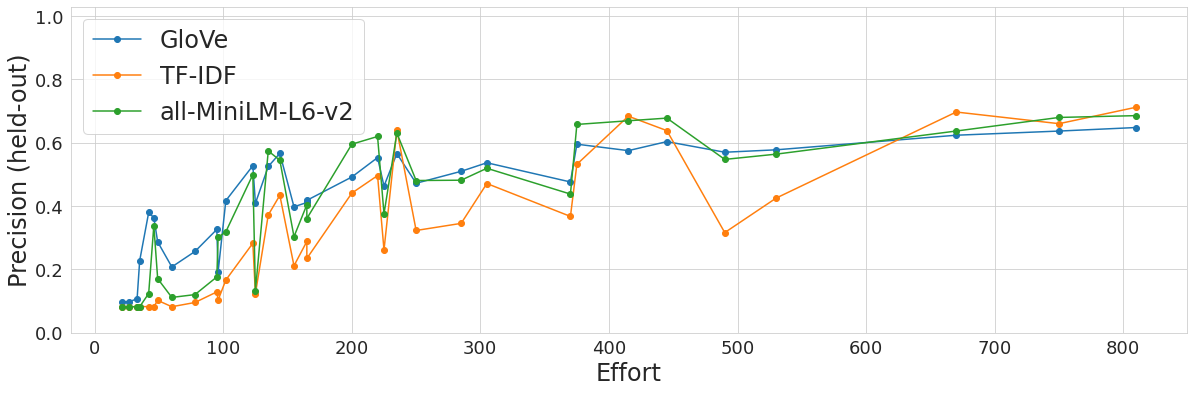

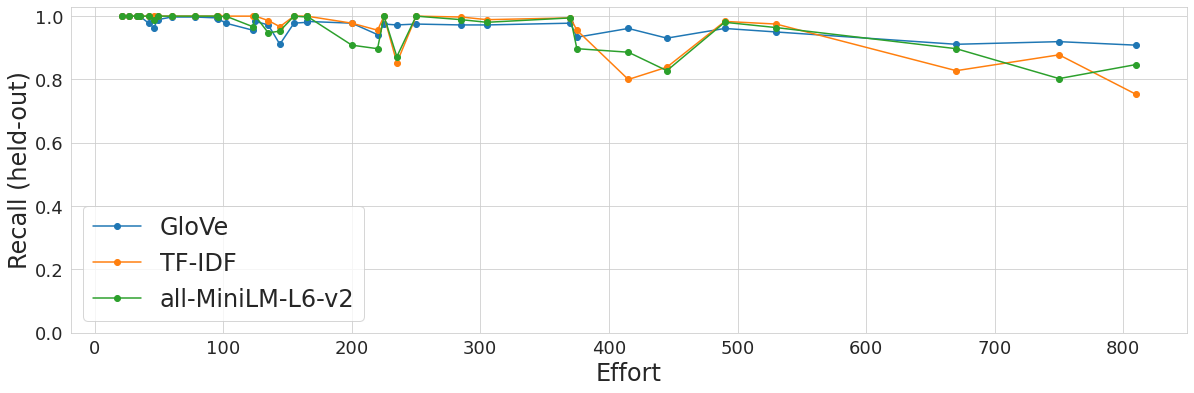

In [ ]:
x_axis = 'Effort'

representation2label = {'bow': 'TF-IDF', 'glove': 'GloVe', 'sbert': 'all-MiniLM-L6-v2'}

sns.set_style('whitegrid')
for metric in ['Precision (held-out)', 'Recall (held-out)', 'F1-Score (held-out)']:
# for metric in ['Precision (test)', 'Recall (test)', 'F1-Score (test)']:
    fig, ax = plt.subplots(1, figsize=(20,6))
    for representation in set(average_df['Representation']):
        auxdf = average_df[average_df['Representation']==representation]
        auxdf=auxdf.sort_values(by='Effort')
        x = auxdf['Effort']
        y = auxdf[metric]
        ax.plot(x,y, label=representation2label[representation], marker='o')

    ax.set_ylim(0,1.03)
#     ax.set_xlim(0,300)
    ax.set_xlabel(x_axis, fontsize=24)
    ax.set_ylabel(metric, fontsize=24)
    ax.legend(fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig(os.path.join(repository_path, 'results', 'figures', f'dp_representation_simulation_figures_{metric}.jpg'), bbox_inches='tight')


